# HW 6

In [1]:
import numpy as np
from matplotlib import pylab as py

## Problem 1, the silly string

$$ \frac{\partial^2y}{\partial t^2} = -2b\frac{\partial y}{\partial t} +c^2(\frac{\partial^2 y}{\partial x^2}-\epsilon L^2 \frac{\partial^4y}{\partial x^4}) $$ 

However it can be solved with Fourier Transforms such that

$$ \frac{d\phi}{dt} = -2b\phi + c^2*k^2(1-\epsilon L^2k^2)\hat{y} \quad where \quad \frac{d\hat{y}}{dt} = \phi  \quad and \quad \hat{y} = F(y)$$

In [4]:
def fftsine(f,x):
    N = len(x); dx = x[1] - x[0]; L = dx*N
    b = np.zeros(N)
    k = 2*np.pi*(np.arange(N) + 1)/(2*L)
    for i in range(N):
        b += 2*f[i]*np.sin(k*x[i])*dx/L
    return(b)

def fftsinei(b,x):
    N = len(x); dx = x[1] - x[0]; L = dx*N
    f = np.zeros(N)
    k = 2*np.pi*(np.arange(N) + 1)/(2*L)
    for i in range(N):
        f += b[i]*np.sin(k[i]*x)
    return(f)

def rk4(x, t, dt, dxdt): # A 4th-order Runge-Kutta solver from slides
    k1 = dt*dxdt(x, t)
    k2 = dt*dxdt(x+0.5*k1, t+0.5*dt)
    k3 = dt*dxdt(x+0.5*k2, t+0.5*dt)
    k4 = dt*dxdt(x+k3, t+dt)
    return (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0

def rhs(vec,t):
    uhat = vec[0]
    vhat = vec[1]
    duhat = vhat
    dvhat = -2 * b * vhat - c**2 * k**2 *(1 + eps * L**2 * k**2 ) * uhat
    return np.array([duhat,dvhat],float)

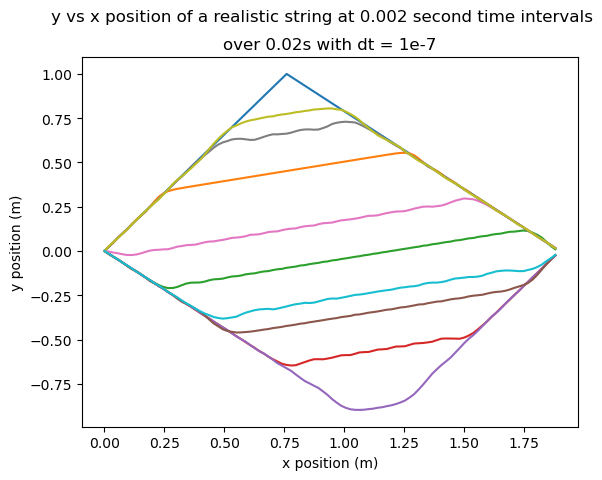

In [14]:
N=100
#### initial conditions of string ####
A = 1 #starting amplitude
L = 1.9 ; c = 250 ; b = 0.5 ; eps = 7.5e-6
dx = L/N ; t = 0 ; dt = 0.000001 ; tmax = 0.02
x = np.arange(N)*dx


k = 2*np.pi*(np.arange(N) + 1)/(2*L)

#### initializing string position #####
c_p = int(0.4*N)
y = np.zeros(N)
v = np.zeros(N)
y[:c_p] = A/(x[c_p])*x[:c_p]
y[c_p:] = -A/(1.9 - x[c_p])*(x[c_p:]-1.9)
k = 2*np.pi*(np.arange(N) + 1)/(2*L)
###########################################



#### re-for'ed un-for'ed for loop ####
while t <= tmax:
    yhat = fftsine(y,x) ; vhat = fftsine(v,x)
    vec = np.array([yhat , vhat],float)
    JJ = rk4(vec,t,dt,rhs)
    JK_0 = JJ[0] ; JK_1 = JJ[1]
    y += fftsinei(JK_0,x) ; v += fftsinei(JK_1,x)
    if round(t,6) % 0.002 == 0:
        py.plot(x,y)
    t += dt

py.xlabel("x position (m)")
py.ylabel("y position (m)")
py.suptitle("y vs x position of a realistic string at 0.002 second time intervals")
py.title("over 0.02s with dt = 1e-7")
py.show()

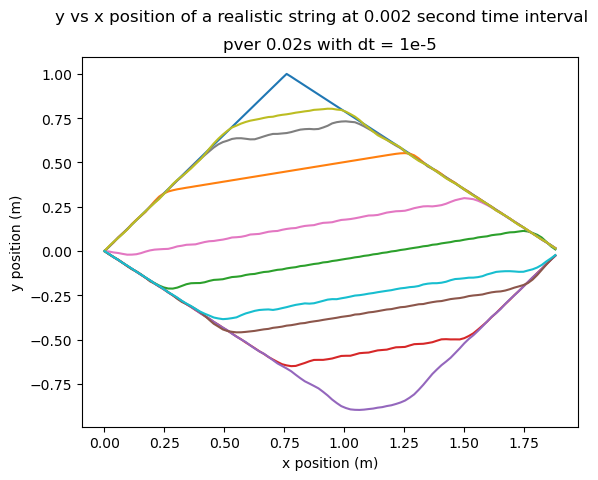

In [6]:
N=100
#### initial conditions of string ####
A = 1 #starting amplitude
L = 1.9 ; c = 250 ; b = 0.5 ; eps = 7.5e-6
dx = L/N ; t = 0 ; dt = 0.00001 ; tmax = 0.02
x = np.arange(N)*dx


k = 2*np.pi*(np.arange(N) + 1)/(2*L)

#### initializing string position #####
c_p = int(0.4*N)
y = np.zeros(N)
v = np.zeros(N)
y[:c_p] = A/(x[c_p])*x[:c_p]
y[c_p:] = -A/(1.9 - x[c_p])*(x[c_p:]-1.9)
k = 2*np.pi*(np.arange(N) + 1)/(2*L)
###########################################



#### re-for'ed un-for'ed for loop ####
while t <= tmax:
    yhat = fftsine(y,x) ; vhat = fftsine(v,x)
    vec = np.array([yhat , vhat],float)
    JJ = rk4(vec,t,dt,rhs)
    JK_0 = JJ[0] ; JK_1 = JJ[1]
    y += fftsinei(JK_0,x) ; v += fftsinei(JK_1,x)
    if round(t,6) % 0.002 == 0:
        py.plot(x,y)
    t += dt
py.xlabel("x position (m)")
py.ylabel("y position (m)")
py.suptitle("y vs x position of a realistic string at 0.002 second time interval")
py.title("pver 0.02s with dt = 1e-5")
py.show()

Picking a reasonable dt is hard. After starting with roughly 1e-7 I brought it up to 5e-5 before it exploded, and it seemed to lose some information between 1e-5 and 1e-6. This is approximately 5e-4 as large at dx. It took roughly 40 seconds to run it at dt = 1e-7 and about 2 at dt = 1e-5. 

Below we will run this for 2 seconds, and looking at the first and last 0.05 seconds

In [111]:
N=100
#### initial conditions of string ####
A = 0.1 #starting amplitude
L = 1.9 ; c = 250 ; b = 0.5 ; eps = 7.5e-6
dx = L/N ; t = 0 ; dt = 0.00001 ; tmax = 2.0
x = np.arange(N)*dx
k = 2*np.pi*(np.arange(N) + 1)/(2*L)

#### initializing string position #####
c_p = int(0.4*N)
y = np.zeros(N)
v = np.zeros(N)
y[:c_p] = A/(x[c_p])*x[:c_p]
y[c_p:] = -A/(1.9 - x[c_p])*(x[c_p:]-1.9)
k = 2*np.pi*(np.arange(N) + 1)/(2*L)
###########################################
#nt = int(tmax/dt)
nsave = 25
yfield = np.zeros((N,201))
yfieldb = np.zeros((N,201))

yfield[:,0] = y
yfieldb[:,0] = y
yhat = fftsine(y,x) ; vhat = fftsine(v,x)

iii = 0 ## interate through yfeildb
ii = 0 ## iterate through yfield
i = 0 ##count runs
j = 39*5000 ## i count at 1.95 seconds

#### re-for'ed un-for'ed for loop ####
while t <= tmax:
    vec = np.array([yhat , vhat],float)
    JJ = rk4(vec,t,dt,rhs)
    t += dt
    i += 1
    yhat += JJ[0] ; vhat += JJ[1]
    y = fftsinei(yhat,x)
    if i % nsave == 0 and i <= 5000:
        ii += 1
        yfield[:,ii] = y
    if i >= j and i % nsave == 0:
        yfieldb[:,iii] = y
        iii += 1
        

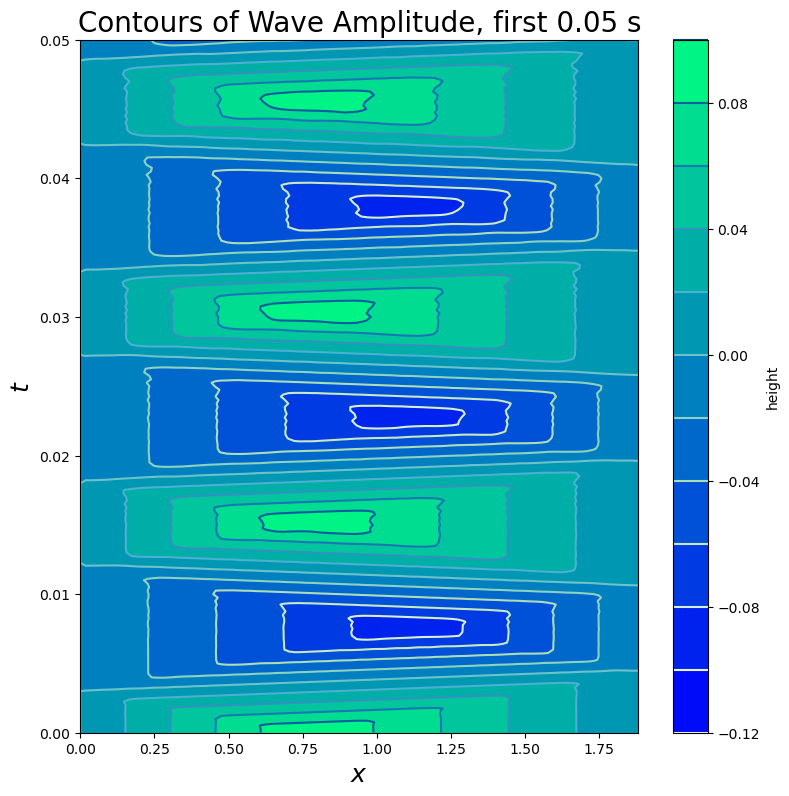

In [105]:
import matplotlib.cm as cm
ts = np.linspace(0, 0.05, 201)
T,X = np.meshgrid(ts,x)
levels = np.arange(-0.12,0.12,0.02)
fig, ax1 = py.subplots(figsize=(9, 9))
CF = ax1.contourf(X,T,yfield, levels, cmap=cm.winter)
CR = ax1.contour(X,T,yfield, levels, cmap=cm.GnBu)
ax1.set_xlabel('$x$',fontsize=18)
ax1.set_ylabel('$t$',fontsize=18)
cbar = fig.colorbar(CF)
cbar.add_lines(CR)
cbar.ax.set_ylabel("height")
ax1.set_title('Contours of Wave Amplitude, first 0.05 s',fontsize=20)
py.show()

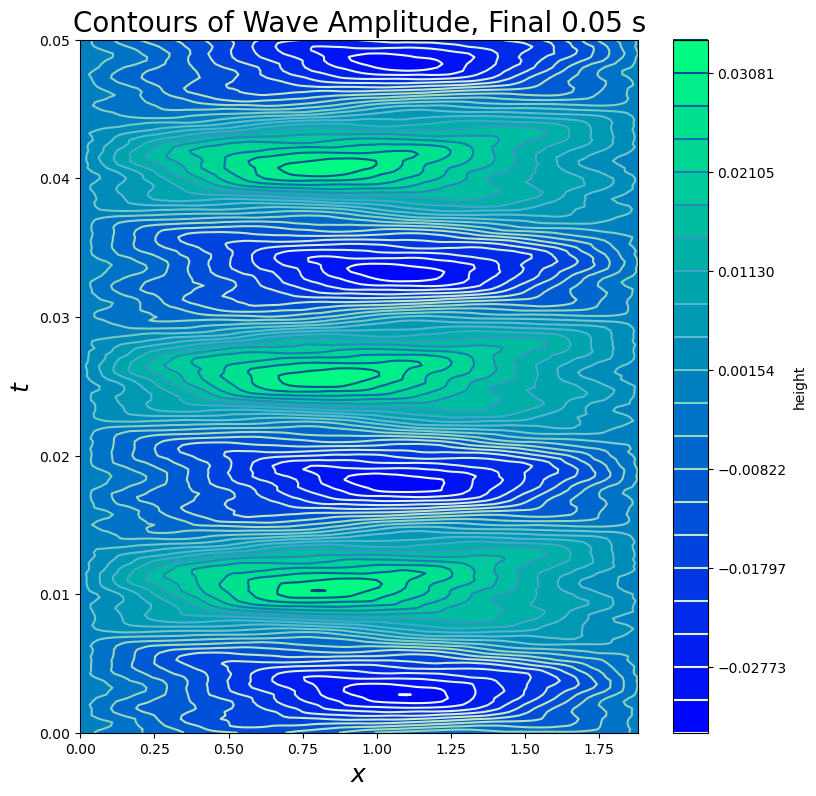

In [107]:
import matplotlib.cm as cm
ts = np.linspace(0, 0.05, 201)
T,X = np.meshgrid(ts,x)
ybmax = np.max(yfieldb)
levels = np.arange(-ybmax,ybmax,ybmax*0.095)
fig, ax1 = py.subplots(figsize=(9, 9))
CF = ax1.contourf(X,T,yfieldb, levels, cmap=cm.winter)
CR = ax1.contour(X,T,yfieldb, levels, cmap=cm.GnBu)
ax1.set_xlabel('$x$',fontsize=18)
ax1.set_ylabel('$t$',fontsize=18)
cbar = fig.colorbar(CF)
cbar.add_lines(CR)
cbar.ax.set_ylabel("height")
ax1.set_title('Contours of Wave Amplitude, Final 0.05 s',fontsize=20)
py.show()

The wave is very ill defined by the end of 2 seconds, and the amplitude has dropped off significantly which is not surprising.
### Power spetrum

In [120]:
N=100
#### initial conditions of string ####
A = 0.1 #starting amplitude
L = 1.9 ; c = 250 ; b = 0.5 ; eps = 7.5e-6
dx = L/N ; t = 0 ; dt = 0.00001 ; tmax = 2.0
x = np.arange(N)*dx
k = 2*np.pi*(np.arange(N) + 1)/(2*L)

#### initializing string position #####
c_p = int(0.4*N)  ### we will choose our point to be on c_p + 15
y = np.zeros(N)
v = np.zeros(N)
y[:c_p] = A/(x[c_p])*x[:c_p]
y[c_p:] = -A/(1.9 - x[c_p])*(x[c_p:]-1.9)
k = 2*np.pi*(np.arange(N) + 1)/(2*L)
###########################################
savepoint = c_p + 15
nsave = 25
ylog = [] ; tlog = []
yhat = fftsine(y,x) ; vhat = fftsine(v,x)

i = 0 ##count runs

#### re-for'ed un-for'ed for loop ####
while t <= tmax:
    vec = np.array([yhat , vhat],float)
    JJ = rk4(vec,t,dt,rhs)
    t += dt
    i += 1
    yhat += JJ[0] ; vhat += JJ[1]
    if i % nsave == 0:
        y = fftsinei(yhat,x)
        ylog.append(y[savepoint]) ; tlog.append(t)

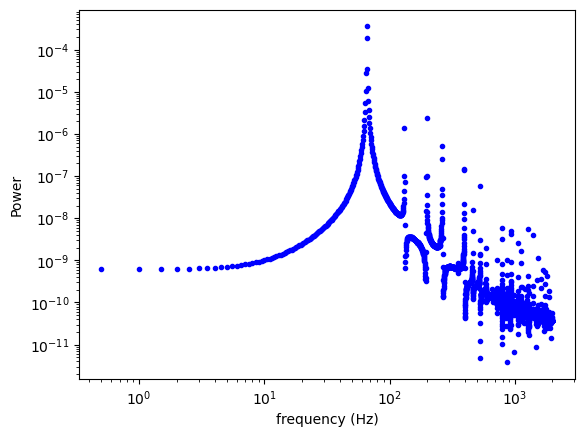

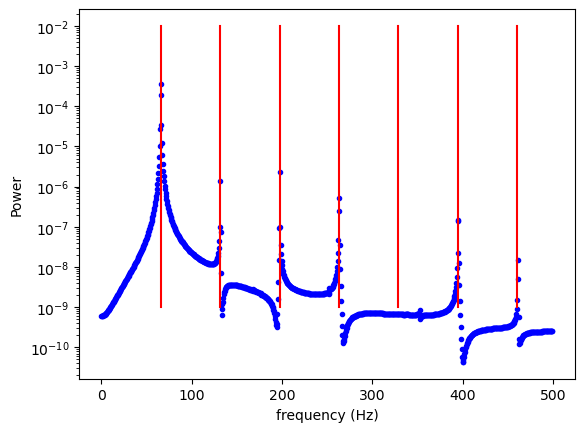

In [118]:
###Stolen from wave spectral example###
ts = np.asarray(tlog); f = np.asarray(ylog) 
g = np.fft.fft(f)
freq = np.fft.fftfreq(len(ts),dt*nsave)
power = np.conjugate(g)*g/(len(f))**2
ipos = int(len(freq)/2)
py.loglog(freq[0:ipos],power.real[0:ipos],'b.')
py.xlabel('frequency (Hz)'); py.ylabel('Power')
py.show()

w0 = c/(2*L)  # The fundamental 
py.semilogy(freq[0:1000],power.real[0:1000],'b.')
py.semilogy((w0,w0),(10e-10,10e-3),'r-',(2*w0,2*w0),(10e-10,10e-3),'r-',(3*w0,3*w0),(10e-10,10e-3),'r-',(4*w0,4*w0),(10e-10,10e-3),'r-',(5*w0,5*w0),(10e-10,10e-3),'r-',(6*w0,6*w0),(10e-10,10e-3),'r-',(7*w0,7*w0),(10e-10,10e-3),'r-')
py.xlabel('frequency (Hz)'); py.ylabel('Power')
py.show()

The power of lower frequencies starts significantly higher than much of the higher frequencies, after all everything is secretly a low-pass filter. So this makes sense. Likewise the highest peak in Power appears at the fundamental, and peaks at integer multiples of the fundamental. Mildly interesing is the complete lack of the 5th harmonic peak, which may mean that the initial conditions simply did not contain this freq. 

## Problem 2

$$ \frac{\partial^2z}{\partial^2t} = +c^2(\frac{\partial^2y}{\partial x^2} + \frac{\partial^2z}{\partial y^2}) $$ 

However it can be solved with Fourier Transforms such that

$$ \frac{d\phi}{dt} = c^2*k^2(\hat{z_x} +\hat{z_y}) \quad where \quad \frac{d\hat{z}}{dt} = \phi  \quad and \quad \hat{z_y} = sinefft(z,y) \quad and \quad \hat{z_x} = sinefft(z,x) $$

In [103]:
import numpy as np
from matplotlib import pylab as np
from scipy.fft import dstn,idstn
import matplotlib.cm as cm

def Z(t):
    norm = (2*(N+1)*2*(N+1))
    A = A0 * np.cos(t*kgrid*c) + (dA0 / kgrid) * np.sin(t*kgrid*c)
    return idstn(A, type=1) / norm

In [99]:
N = 100
L = 0.6 ; c = 120.0 ; w = L/10
x = np.linspace(0,L,N); y = np.arange(N) *dx 
X,Y = np.meshgrid(x,y)

i = np.arange(1,N+1) ## We have a square N is the same
j = np.arange(1,N+1) ## +1 saves us the trouble from needing the +1 in k = 2*np.pi*(np.arange(N) + 1)/(2*L)
I,J = np.meshgrid(i,j)
kgrid = np.pi / L * np.sqrt(I**2+J**2)

## initialize
Z0 = np.exp(-((X-L/2)**2/w**2)) * np.exp(-((Y-L/2)**2/w**2))
dZ0 = np.zeros_like(Z0)

## toss in freq space
A0 = dstn(Z0, type=1)
dA0 = dstn(dZ0, type=1)

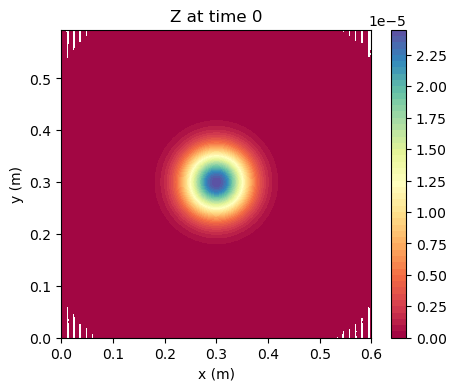

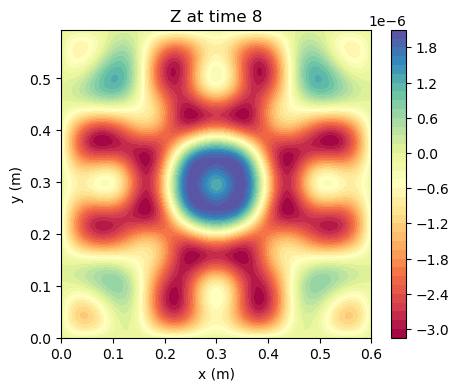

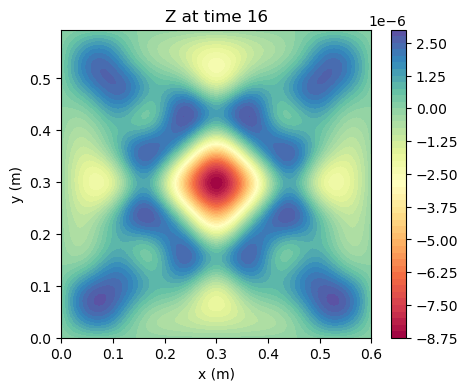

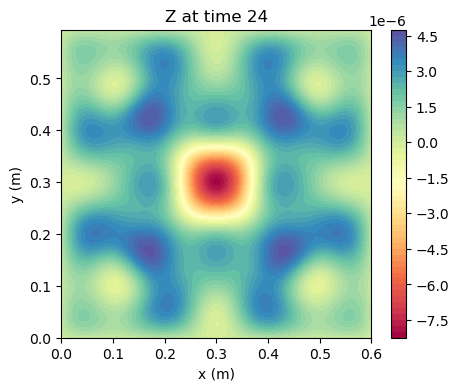

In [145]:
fig, ax1 = py.subplots(figsize=(5,4))
axs.ravel()
z = Z(0)
CF = ax1.contourf(X,Y,z, 50, cmap = "Spectral")
ax1.set_title("Z at time 0")
ax1.set_ylabel("y (m)")
ax1.set_xlabel("x (m)")
fig.colorbar(CF)
py.show()
### I sincerely apologize for this ####
fig, ax1 = py.subplots(figsize=(5,4))
z = Z(8)
CF = ax1.contourf(X,Y,z, 50, cmap = "Spectral")
ax1.set_title("Z at time 8")
ax1.set_ylabel("y (m)")
ax1.set_xlabel("x (m)")
fig.colorbar(CF)
################
fig, ax1 = py.subplots(figsize=(5,4))
z = Z(16)
CF = ax1.contourf(X,Y,z, 50, cmap = "Spectral")
ax1.set_title("Z at time 16")
ax1.set_ylabel("y (m)")
ax1.set_xlabel("x (m)")
fig.colorbar(CF)
py.show()
#####################
fig, ax1 = py.subplots(figsize=(5,4))
z = Z(24)
CF = ax1.contourf(X,Y,z, 50, cmap = "Spectral")
ax1.set_title("Z at time 24")
ax1.set_ylabel("y (m)")
ax1.set_xlabel("x (m)")
fig.colorbar(CF)
py.show()

The symmetry of the initial conditions make the results at each time symmetric. and While it takes a few moments the wave reflects off the walls, continually adding more and more interference to graph. The second graph is quite interesting, because it caught a glimpse of what happens when the center is roughly zero, whereas all the other graphs catch it when it is the main peak. Since no energy is added to the system it makes sense that maximum for this graph is much less than the max of the intial condition.